In [ ]:
## pc LABO--------------
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyvisa
import pandas as pd
import nysg_tools as ny
import time

In [ ]:
## COLAB---------------
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
#import pyvisa
import pandas as pd
!pip install nysg_tools
import nysg_tools as ny
import time

In [ ]:
rm = pyvisa.ResourceManager()
rm.list_resources()

('ASRL1::INSTR', 'ASRL10::INSTR')

In [ ]:
osci_name = "USB0::0x0699::0x0368::C017059::INSTR"
fungen_name = "USB0::0x0699::0x0353::1625721::INSTR"

osci = rm.open_resource(osci_name)
fungen = rm.open_resource(fungen_name)

# CH1 -> INPUT
# CH2 -> OUTPUT

VisaIOError: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.

In [ ]:
def get_osci(additional_info = False, plot=False):
    osci.write("DAT:SOU CH1")
    xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
    yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
    osci.write("DAT:SOU CH2")

    yze2, ymu2, yoff2 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')

    osci.write('DAT:ENC RPB')
    osci.write('DAT:WID 1')

    osci.write("DAT:SOU CH1")
    data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)

    osci.write("DAT:SOU CH2")
    data2 = osci.query_binary_values('CURV?', datatype='B', container=np.array)

    tiempo = xze + np.arange(len(data1)) * xin

    data1v = (data1 - yoff1) * ymu1 + yze1
    data2v = (data2 - yoff2) * ymu2 + yze2

    if plot:
        plt.plot(tiempo,data1v)
        plt.plot(tiempo,data2v)

    if additional_info:
        extra = {"yze1":yze1,"ymu1":ymu1,"yoff1":yoff1,"yze2":yze2,"ymu2":ymu2,"yoff2":yoff2,"datach1raw":data1,"datach2raw":data2}
        return tiempo,data1v,data2v, extra

    return tiempo,data1v,data2v

def osci_autosave(filename,attrs,plot_saved=False):
    t,v1,v2 = get_osci()
    buffer =  pd.DataFrame({"time":t,"VCH1":v1,"VCH2":v2})

    buffer.attrs = attrs

    buffer.to_csv(f'{filename}{".csv"}')
    buffer.to_pickle(f'{filename}')

    if plot_saved:
        plt.plot(t,v1)
        plt.plot(t,v2)

In [ ]:
# UNA SOLA MEDICION
attrs = {"Freq":1660, "Res":10000,"cap":1*10**(-9),"amplt":5,"inductancia":10*10**(-3),"onda":"cuadrada"}
osci_autosave("data/med1/med6",attrs=attrs,plot_saved=True)

In [ ]:
######   BARRIDO
#freq = [200,500,800,900,1000,1300,1400,1500,1700,1800,1900,2000,2100,2500,2300,2400,2800,3000,3200,3400,3600,3800,4000] #Nuevos datos
#freq = np.linspace(81000,120000,20)  ### lineal
freq = np.logspace(4,6,50)  ### logaritmico
overf = 1/np.array(freq)

for (i,freq) in enumerate(freq):
     fungen.write(f'SOURCE1:FREQ {freq}')
     osci.write(f"HOR:MAI:SCALE {3/10 * 0.8 *overf[i]}")
     time.sleep(0.5)
     attrs = {"Freq":freq, "Res":1000,"cap":0.001*10**(-6),"amplt":5,"inductancia":10*10**(-3),"onda":"senoidal"}
     osci_autosave(f"data/data{i}",attrs=attrs)


In [ ]:
vs = np.array([])
vs1 = np.array([])
freq = np.array([])

for n in range(80):
    print(n)
    buff = pd.read_pickle(f"data/med2/swipe{n}")
    vs = np.append(vs,np.max(buff['VCH2']))
    freq = np.append(freq,buff.attrs['Freq'])

n=0
i = 0

for n in range(8):
    print(n)
    buff = pd.read_pickle(f"data/med2/afterswipe{n}")
    vs = np.append(vs,np.max(buff['VCH2']))
    freq = np.append(freq,buff.attrs['Freq'])



for n in range(5):
    print(n)
    buff = pd.read_pickle(f"data/med2/afterafterswipe{n}")
    vs = np.append(vs,np.max(buff['VCH2']))
    freq = np.append(freq,buff.attrs['Freq'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
0
1
2
3
4
5
6
7
0
1
2
3
4


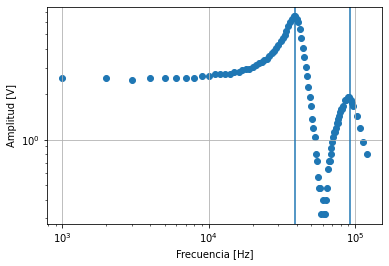

In [ ]:
plt.scatter(freq,vs)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [V]")
# plt.savefig("Curva resonancia.pdf",dpi =300)
plt.axvline(39000)
plt.axvline(92000)
plt.xscale('log')
plt.grid(
)
plt.yscale('log')

In [ ]:
a = pd.read_pickle(f"data/med2/afterswipe{1}").attrs['Freq']

FileNotFoundError: [Errno 2] No such file or directory: 'data/med2/afterswipe1'

In [ ]:
a

83052.63157894737

In [ ]:
b= a.attrs

In [ ]:
b['Freq']

83052.63157894737

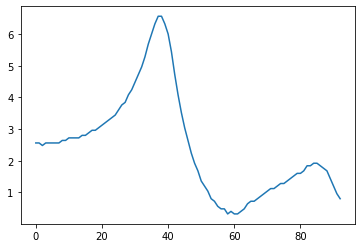

In [ ]:
plt.plot(vs)
plt.xlabel("n")